In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 1. Data Preparation

In [3]:
w = 0.5
b = 2

X = np.linspace(0, 100, 50)
y = w*X + b

X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

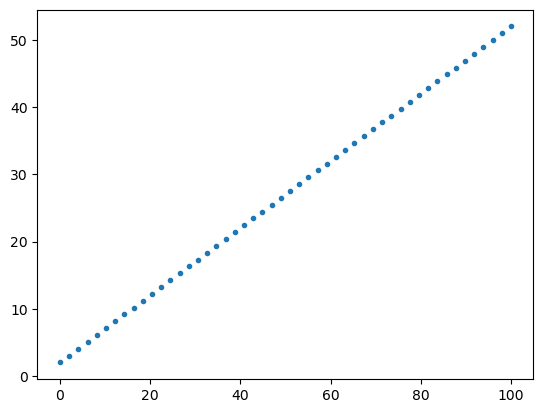

In [4]:
plt.scatter(X, y, marker='.')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

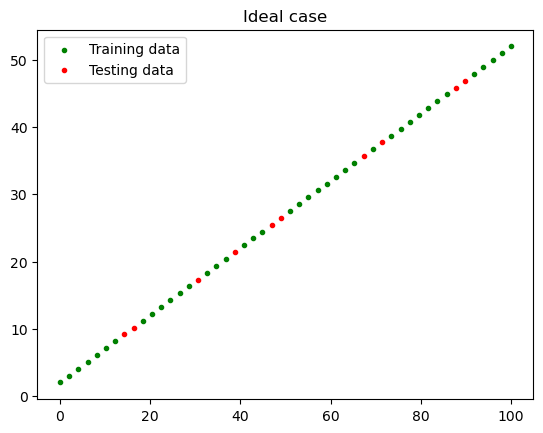

In [6]:
plt.scatter(X_train, y_train, color='g', label='Training data', marker='.')
plt.scatter(X_test, y_test, color='r', label='Testing data', marker='.')
plt.title("Ideal case")
plt.legend()

# 2. Model Building using Functional API

In [7]:
from tensorflow.keras import Sequential, Input, Model

input = Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)
reg_model = Model(inputs=input, outputs=output)

In [11]:
weight, bias = reg_model.get_weights()
print(weight, bias)

[[-1.4514066]] [0.]


In [12]:
# Without training the output
y_pred = reg_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 18ms/step


array([[ -56.27903 ],
       [ -20.73438 ],
       [-130.3304  ],
       [-127.36834 ],
       [ -97.747795],
       [-103.671906],
       [ -44.430817],
       [ -68.12724 ],
       [ -71.0893  ],
       [ -23.696434]], dtype=float32)

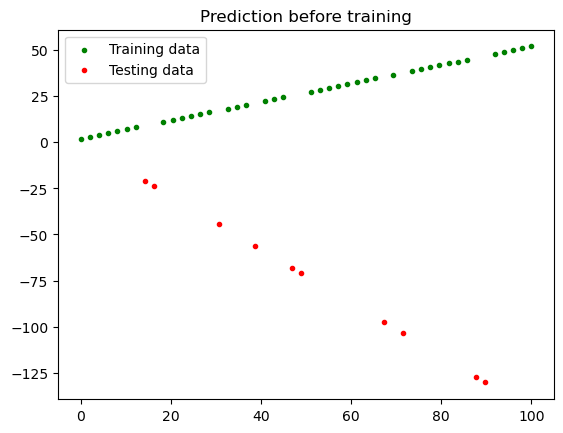

In [13]:
plt.scatter(X_train, y_train, color='g', label='Training data', marker='.')
plt.scatter(X_test, y_pred, color='r', label='Testing data', marker='.')
plt.title("Prediction before training")
plt.legend()

# 3. Preparing for training

In [16]:
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=10, decay_steps=1, decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_scheduler)

log_dir = './logs'
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [17]:

reg_model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [25]:
reg_model.fit(train_ds, validation_data=test_ds, epochs=60, callbacks=[tensorboard_cb])

Epoch 1/60
 1/40 [..............................] - ETA: 0s - loss: 85.0548

40/40 [==============================] - 0s 3ms/step - loss: 257.9326 - val_loss: 240.0474
Epoch 2/60
40/40 [==============================] - 0s 4ms/step - loss: 237.0598 - val_loss: 220.4281
Epoch 3/60
40/40 [==============================] - 0s 4ms/step - loss: 217.5406 - val_loss: 202.0953
Epoch 4/60
40/40 [==============================] - 0s 3ms/step - loss: 199.3135 - val_loss: 184.9900
Epoch 5/60
40/40 [==============================] - 0s 3ms/step - loss: 182.3181 - val_loss: 169.0541
Epoch 6/60
40/40 [==============================] - 0s 4ms/step - loss: 166.4955 - val_loss: 154.2304
Epoch 7/60
40/40 [==============================] - 0s 4ms/step - loss: 151.7878 - val_loss: 140.4637
Epoch 8/60
40/40 [==============================] - 0s 3ms/step - loss: 138.1386 - val_loss: 127.6996
Epoch 9/60
40/40 [==============================] - 0s 3ms/step - loss: 125.4927 - val_loss: 115.8846
Epoch 10/60
40/40 [==============================] - 0s 3ms/step - loss: 113.7964 - val_loss:

In [26]:
weight, bias = reg_model.get_weights()
print(weight, bias)

[[0.4937683]] [2.2562373]


1/1 [==============================] - 0s 30ms/step


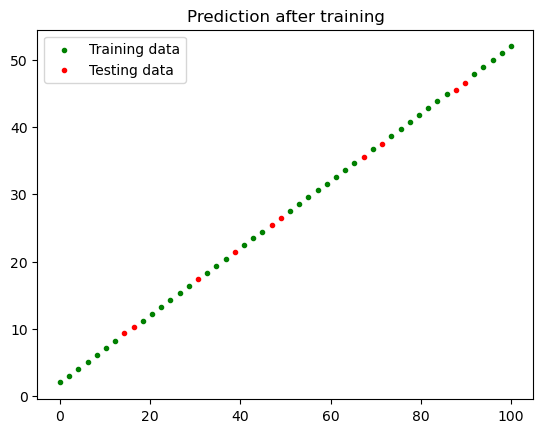

In [28]:
# After training the output
y_pred = reg_model.predict(X_test)

plt.scatter(X_train, y_train, color='g', label='Training data', marker='.')
plt.scatter(X_test, y_pred, color='r', label='Testing data', marker='.')
plt.title("Prediction after training")
plt.legend()

# 4. Saving the model

In [36]:
reg_model.save('./best_model')

INFO:tensorflow:Assets written to: ./best_model\assets


# 5. Loading the model

In [37]:
from tensorflow.keras.models import load_model

reg_model = load_model('./best_model')

1/1 [==============================] - 0s 43ms/step


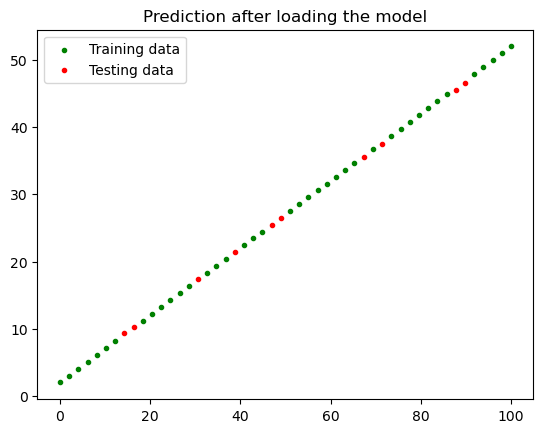

In [39]:
# After training the output
y_pred = reg_model.predict(X_test)

plt.scatter(X_train, y_train, color='g', label='Training data', marker='.')
plt.scatter(X_test, y_pred, color='r', label='Testing data', marker='.')
plt.title("Prediction after loading the model")
plt.legend()